[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

# AI Program

## Machine Learning - Supervised Learning - Regression - Polynomial Fit - Exercise

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 23/03/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0046RegressorPolynomialFit.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Miscellaneous
import math
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, Dict, List, Optional, Set, Tuple, Union

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image
from IPython.display import display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout, SelectionSlider
from ipywidgets import interact

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [2]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())


In [3]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2

PEOPLE_CSV_URL = 'https://github.com/FixelAlgorithmsTeam/FixelCourses/raw/master/DataSets/People.csv'


In [4]:
# Courses Packages
import sys
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataVisualization import PlotRegressionData, PlotRegressionResults


In [5]:
# General Auxiliary Functions

def PolyModelString( vW: np.ndarray, applyLatex: bool = True ) -> str:
    
    latexDelimiter = '$' if applyLatex else ''

    modelTxt = latexDelimiter + 'y = '
    for ii in range(len(vW)):
        modelTxt += f'({vW[ii]:0.3f}) {{x}}^{{{ii}}} + '
    
    modelTxt = modelTxt[:-2]
    modelTxt += latexDelimiter

    return modelTxt


## Polynomial Fit

In this exercise we'll build an estimator with the Sci Kit Learn API.  
The model will employ a 1D Polynomial fit of degree `P`. 

We'll us the [`People.csv`](https://github.com/FixelAlgorithmsTeam/FixelCourses/blob/master/DataSets/People.csv) data set.  
It includes 1000 samples of peoples: Sex, Age, Height (CM), Weight (KG).

The objective is to estimate the weight given the height. 

I this exercise we'll do the following:

1. Load the [`People.csv`](https://github.com/FixelAlgorithmsTeam/FixelCourses/blob/master/DataSets/People.csv) data set using `pd.csv_read()`.
2. Create a an estimator (Regressor) class using SciKit API:
   - Implement the constructor.
   - Implement the `fit()`, `predict()` and `score()` methods.
3. Verify the estimator vs. `np.polyfit()`.
4. Display the output of the model.

* <font color='brown'>(**#**)</font> In order to let the classifier know the data is binary / categorical we'll use a **Data Frame** as the data structure.

In [6]:
# Parameters

# Model
polynomDeg = 2

# Data Visualization
gridNoiseStd = 0.05
numGridPts = 250

## Generate / Load Data

Loads the online `csv` file directly as a Data Frame.

In [7]:
# Load Data

dfPeople = pd.read_csv(PEOPLE_CSV_URL)

dfPeople.head(10)

,Sex,Age,Height,Weight
0,f,26,171.1,57.0
1,m,44,180.1,84.7
2,m,32,161.9,73.6
3,m,27,176.5,81.0
4,f,26,167.3,57.4
5,m,56,165.9,72.1
6,f,47,169.6,58.7
7,f,45,179.9,64.0
8,f,37,168.9,62.6
9,m,42,168.6,77.7


### Plot Data

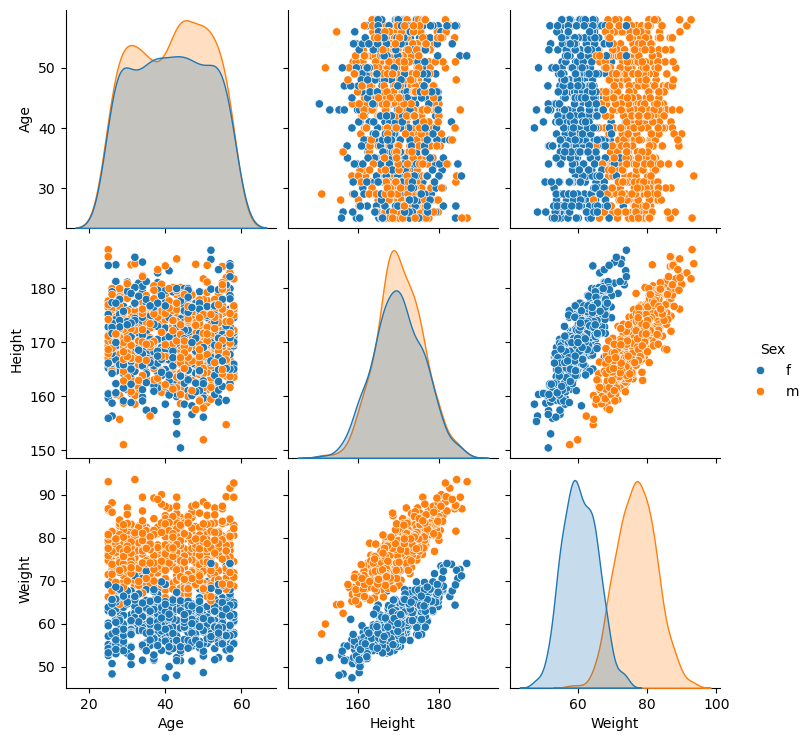

In [8]:
# Pair Plot

sns.pairplot(data = dfPeople, hue = 'Sex')


* <font color='red'>(**?**)</font> How would you model the data for the task of estimation of the weight of a person given his sex, age and height?

In [9]:
# The Training Data 

#===========================Fill This===========================#
# 1. Extract the 'Height' column into a series `dsX`.
# 2. Extract the 'Weight' column into a series `dsY`.
dsX = dfPeople['Height'].copy()
dsY = dfPeople['Weight'].copy()
#===============================================================#

print(f'The features data shape: {dsX.shape}')
print(f'The labels data shape: {dsY.shape}')

The features data shape: (1000,)
The labels data shape: (1000,)


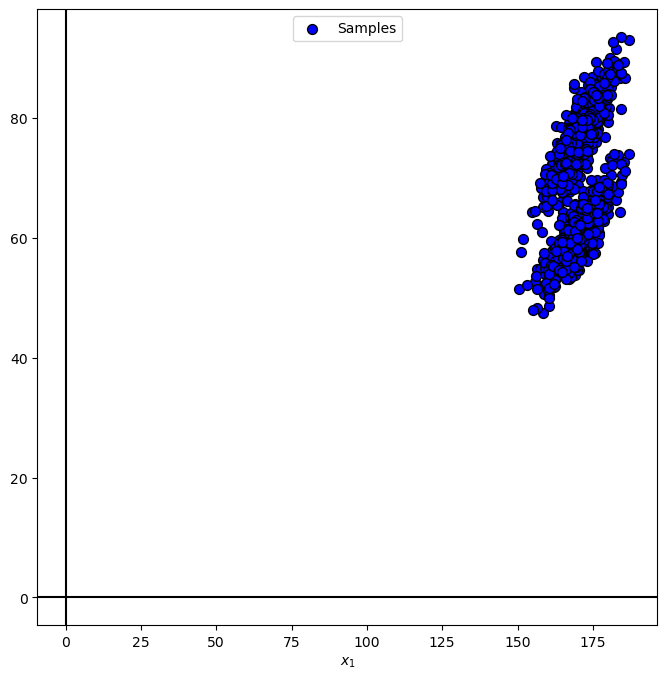

In [10]:
# Plot the Data

PlotRegressionData(dsX.to_numpy(), dsY.to_numpy())

plt.show()

* <font color='red'>(**?**)</font> Which polynomial order fits the data?

## Polyfit Regressor

The PolyFit optimization problem is given by:

$$ \arg \min_{\boldsymbol{w}} {\left\| \boldsymbol{\Phi} \boldsymbol{w} - \boldsymbol{y} \right|}_{2}^{2} $$

Where

$$
\boldsymbol{\Phi} = \begin{bmatrix} 1 & x_{1} & x_{1}^{2} & \cdots & x_{1}^{p} \\
1 & x_{2} & x_{2}^{2} & \cdots & x_{2}^{p} \\
\vdots & \vdots & \vdots &  & \vdots \\
1 & x_{N} & x_{N}^{2} & \cdots & x_{N}^{p}
\end{bmatrix}
$$

This is a _polyfit_ with hyper parameter $p$.

The optimal weights are calculated by linear system solvers.  
Yet it is better to use solvers optimized for this task, such as:

 * NumPy: [`polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html).
 * SciKit Learn: [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) combined with [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

In this notebook we'll implement our own class based on SciKit Learn's solutions.

* <font color='brown'>(**#**)</font> For arbitrary $\Phi$ the above becomes a _linear regression_ problem.

### Polyfit Estimator

We could create the linear polynomial fit estimator using a `Pipeline` of `PolynomialFeatures` and `LinearRegression`.  
Yet since this is a simple task it is a good opportunity to exercise the creation of a _SciKit Estimator_.

We need to provide 4 main methods:

1. The `__init()__` Method: The constructor of the object. It should set the degree of the polynomial model used.
2. The `fit()` Method: The training phase. It should calculate the matrix and solve the linear regression problem.

In [11]:
class PolyFitRegressor(RegressorMixin, BaseEstimator):
    def __init__(self, polyDeg = 2):
        #===========================Fill This===========================#
        # 1. Add `polyDeg` as an attribute of the object.
        # 2. Add `PolynomialFeatures` object as an attribute of the object.
        # 3. Add `LinearRegression` object as an attribute of the object.
        # !! Configure `PolynomialFeatures` by the `include_bias` parameter 
        #    and `LinearRegression` by the `fit_intercept` parameter 
        #    in order to avoid setting the constants columns.
        self.polyDeg   = polyDeg
        self.oPolyFeat = PolynomialFeatures(degree = polyDeg, interaction_only = False, include_bias = False)
        self.oLinReg   = LinearRegression(fit_intercept = True)
        #===============================================================#
        
        pass #<! The `__init__()` method should not return any value!
    
    def fit(self, mX, vY):
        
        if np.ndim(mX) != 2:
            raise ValueError(f'The input `mX` must be an array like of size (n_samples, 1) !')
        
        if mX.shape[1] !=  1:
            raise ValueError(f'The input `mX` must be an array like of size (n_samples, 1) !')
        
        #===========================Fill This===========================#
        # 1. Apply `fit_transform()` for the features using `oPolyFeat`.
        # 2. Apply `fit()` on the features using `oLinReg`.
        # 3. Extract `coef_`, `rank_`, `singluar_`, `intercept_` and `n_features_in_` from `oLinReg`.
        # 4. Set `vW_`, as the total weights in the order of the matrix Φ above.
        mXX                 = self.oPolyFeat.fit_transform(mX)
        self.oLinReg        = self.oLinReg.fit(mXX, vY)
        self.coef_          = self.oLinReg.coef_
        self.rank_          = self.oLinReg.rank_
        self.singular_      = self.oLinReg.singular_
        self.intercept_     = self.oLinReg.intercept_
        self.n_features_in_ = self.oLinReg.n_features_in_
        self.vW_            = np.concatenate((np.atleast_1d(self.oLinReg.intercept_), self.oLinReg.coef_), axis = 0)
        #===============================================================#

        return self
    
    def predict(self, mX):

        if np.ndim(mX) != 2:
            raise ValueError(f'The input `mX` must be an array like of size (n_samples, 1) !')
        
        if mX.shape[1] !=  1:
            raise ValueError(f'The input `mX` must be an array like of size (n_samples, 1) !')
        
        #===========================Fill This===========================#
        # 1. Construct the features matrix.
        # 2. Apply the `predict()` method of `oLinReg`.
        mXX = self.oPolyFeat.fit_transform(mX)
        vY  = self.oLinReg.predict(mXX)
        #===============================================================#

        return vY
    
    def score(self, mX, vY):
        # Return the RMSE as the score

        if (np.size(vY) != np.size(mX, axis = 0)):
            raise ValueError(f'The number of samples in `mX` must match the number of labels in `vY`.')

        #===========================Fill This===========================#
        # 1. Apply the prediction on the input features.
        # 2. Calculate the RMSE vs. the input labels.
        vYPred  = self.predict(mX)
        valRmse = np.sqrt(np.mean(np.square(vY - vYPred)))
        #===============================================================#

        return valRmse


* <font color='brown'>(**#**)</font> The model above will fail on SciKit Learn's `check_estimator()`.  
  It fils since it limits to a certain type of input data (Single column matrix) and other things (Setting attributes in `__init__()` etc...).  
  Yet it should work as part of a pipeline.

### Training

In this section we'll train the model on the whole data using the class implemented above.

In [12]:
# Construct the Polynomial Regression Object

#===========================Fill This===========================#
# 1. Construct the model using the `PolyFitRegressor` class and `polynomDeg`.
oPolyFit = PolyFitRegressor(polyDeg = polynomDeg)
#===============================================================#

In [13]:
# Train the Model

#===========================Fill This===========================#
# 1. Convert `dsX` into a 2D matrix `mX` of shape `(numSamples, 1)`.
# 2. Convert `dsY` into a vector `vY` of shape `(numSamples, )`.
# 3. Fit the model using `mX` and `vY`.
# !! SciKit Learn's model requires input data as 2D array (DF / Matrix).
mX = np.reshape(dsX.to_numpy(), (-1, 1)) #<! NumPy array
vY = dsY.to_numpy() #<! NumPy vector

oPolyFit = oPolyFit.fit(mX, vY)
#===============================================================#

In [14]:
# Model Parameters

# Extract the Coefficients of the model.
vW = oPolyFit.vW_


In [15]:
# Verify Model

vWRef = np.polyfit(dsX.to_numpy(), dsY.to_numpy(), deg = polynomDeg)[::-1]

for ii in range(polynomDeg + 1):
    print(f'The model {ii} coefficient: {vW[ii]}, The reference coefficient: {vWRef[ii]}')

maxAbsDev = np.max(np.abs(vW - vWRef))
print(f'The maximum absolute deviation: {maxAbsDev}') #<! Should be smaller than 1e-8

if (maxAbsDev > 1e-8):
    print(f'Error: The implementation of the model is in correct!')


The model 0 coefficient: -211.41155336386498, The reference coefficient: -211.41155336374274
The model 1 coefficient: 2.512083188841756, The reference coefficient: 2.5120831888403163
The model 2 coefficient: -0.005066608270394755, The reference coefficient: -0.005066608270390533
The maximum absolute deviation: 1.2224177226016764e-10


### Display Error and Score

When dealing with regression there is a useful visualization which shows the predicted value vs the reference value.  
This allows showing the results regardless of the features number of dimensions.

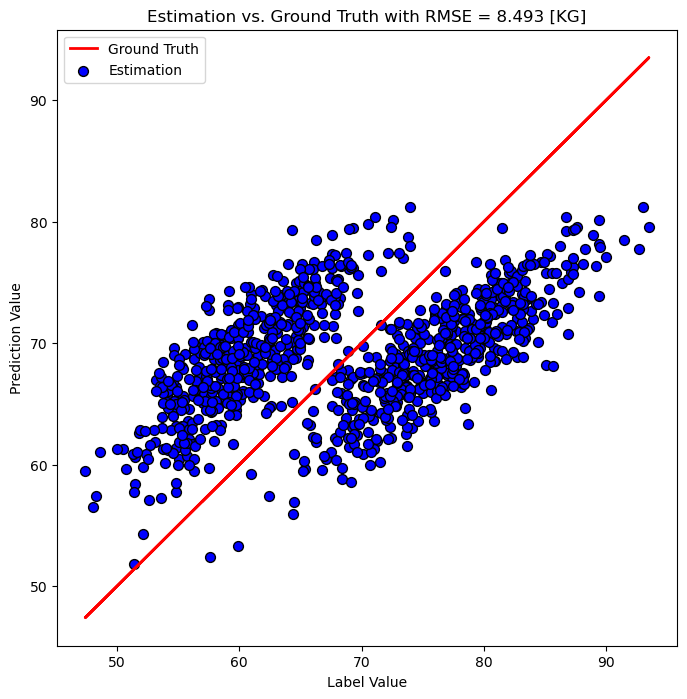

In [16]:
# Plot the Prediction
hF, hA = plt.subplots(figsize = FIG_SIZE_DEF)

PlotRegressionResults(vY, oPolyFit.predict(mX), hA = hA, axisTitle = f'Estimation vs. Ground Truth with RMSE = {oPolyFit.score(mX, vY):0.3f} [KG]')

plt.show()

Since the features are 1D we can also show the prediction as a function of the input.

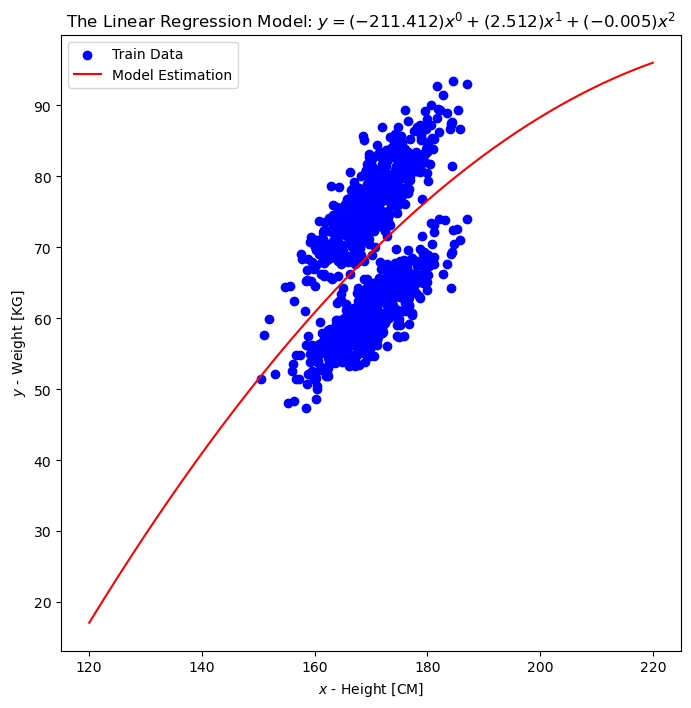

In [17]:
# Prediction vs. Features

vXX = np.linspace(120, 220, 2000)
hF, hA = plt.subplots(figsize = FIG_SIZE_DEF)

modelTxt = '$y = '
for ii in range(polynomDeg + 1):
    modelTxt += f'({vW[ii]:0.3f}) {{x}}^{{{ii}}} + '

modelTxt = modelTxt[:-2]
modelTxt += '$'

hA.scatter(dsX.to_numpy(), dsY.to_numpy(), color = 'b', label = 'Train Data')
hA.plot(vXX, oPolyFit.predict(np.reshape(vXX, (-1, 1))), color = 'r', label = 'Model Estimation')
hA.set_title(f'The Linear Regression Model: {modelTxt}')
hA.set_xlabel('$x$ - Height [CM]')
hA.set_ylabel('$y$ - Weight [KG]')
hA.legend()

plt.show()

* <font color='red'>(**?**)</font> What did the model predict? What should be done?
* <font color='blue'>(**!**)</font> Try the above with the model order fo 1 and 3.